In [42]:
import numpy as np
import pandas as pd
import os

# 1. Calling sklearn libraries

# 2. Splitting data into train and test data
from sklearn.model_selection import train_test_split

# 3. PReprocessong:
from sklearn.preprocessing import StandardScaler

# 4. Importing class DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier as dtree

# 5. Drawing Decision Tree
from sklearn.tree import export_graphviz

# 6. Importing iris dataset
from sklearn.datasets import load_iris

# 7. 
# Install as:
#   conda install -c conda-forge python-graphviz 
#   conda install -c anaconda pydot
import graphviz

# 8. 
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns


In [43]:
df = pd.read_csv("income_evaluation.csv")

In [44]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [46]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [47]:
df.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [48]:
# removing redundant spaces from column names
df.columns = list(map(lambda a: a.lstrip(), df.columns))

In [49]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [50]:
df.shape

(32561, 15)

In [51]:
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [52]:
shape0 = df.shape[0]
for column in df.columns:
    df[column].replace(' ?', np.NaN, inplace=True)
df = df.dropna().reset_index().drop(columns=['index'])
shape1 = df.shape[0]
print(str(shape0 - shape1) + ' rows have been removed.')

2399 rows have been removed.


In [53]:
income = df.income.value_counts()
income

 <=50K    22654
 >50K      7508
Name: income, dtype: int64

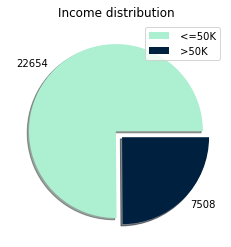

In [54]:
colors = ['#ADEFD1FF', '#00203FFF']
explode = [0, 0.1]
plt.pie(income, labels=income.values, colors=colors, explode = explode, shadow=True)
plt.title('Income distribution')
plt.legend(labels=income.index)

In [55]:
df['income'].replace([' <=50K',' >50K'],[1,0], inplace=True)

In [56]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income             int64
dtype: object

In [57]:
# Object type variables cannot be included in a correlation heatmap.
stats = df.select_dtypes(['float', 'int64']).drop(columns=['income'])

Text(0.5, 1.0, 'Correlation Factors Heat Map')

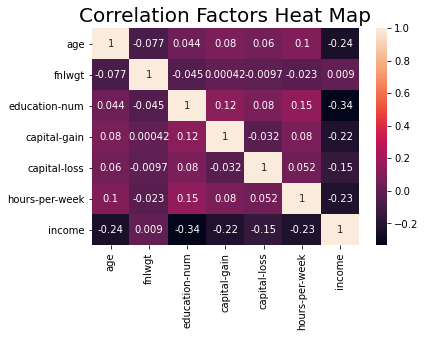

In [58]:
#Checking correaltion between the variables
sns.heatmap(df.corr(), annot=True).set_title('Correlation Factors Heat Map', color='black', size='20')

In [59]:
df_final = pd.get_dummies(df)
df_final.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [60]:
X = df_final.drop(columns=['income'])
y = df_final['income']

In [61]:
# 2.4.1 Instantiate object
ss = StandardScaler()

# 2.4.2 Train object on data
ss.fit(X)

# 2.4.3 Transform data
X = ss.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [62]:
ct = dtree(
           criterion="entropy",    # Alternative 'entropy'
           max_depth=None       # Alternative, specify an integer
                              # 'None' means full tree till single leaf
           )
# 5.1
_=ct.fit(X_train,y_train)
_=plt.show()

In [63]:
y_te = ct.predict(X_test)
np.sum((y_test == y_te))/y_test.size

0.8119129185545364

In [64]:
fi = ct.feature_importances_
fi

array([1.33715371e-01, 1.93388444e-01, 1.01644099e-01, 9.81835042e-02,
       3.63773468e-02, 6.97720724e-02, 4.31261598e-03, 7.65075935e-03,
       7.69521905e-03, 5.37876207e-03, 6.65581889e-03, 5.42626324e-03,
       0.00000000e+00, 0.00000000e+00, 6.82717431e-04, 4.29441205e-04,
       0.00000000e+00, 1.32815582e-04, 3.58357741e-04, 5.00225203e-04,
       8.01172895e-04, 2.60304109e-03, 1.13840051e-03, 6.97343674e-04,
       2.61120400e-03, 1.11323095e-03, 0.00000000e+00, 1.29378507e-03,
       2.76816886e-03, 3.28883018e-03, 5.90614034e-04, 1.91352632e-01,
       8.21027895e-04, 1.73580886e-03, 1.20984971e-03, 1.57692346e-03,
       4.02980767e-03, 0.00000000e+00, 7.92117212e-03, 1.07511998e-02,
       3.24995391e-03, 2.49710466e-03, 6.54099530e-03, 4.21456248e-03,
       0.00000000e+00, 7.43124511e-03, 3.03109544e-03, 5.97171213e-03,
       5.35033262e-03, 3.70045125e-03, 1.45233789e-03, 3.51438231e-03,
       1.02053202e-03, 1.30718472e-03, 1.28878590e-03, 5.29593120e-03,
      

In [65]:
list(zip(df.columns, fi))

[('age', 0.13371537125285682),
 ('workclass', 0.19338844381641437),
 ('fnlwgt', 0.1016440985033368),
 ('education', 0.09818350422297686),
 ('education-num', 0.03637734682667965),
 ('marital-status', 0.06977207242377492),
 ('occupation', 0.004312615977641775),
 ('relationship', 0.007650759353947337),
 ('race', 0.007695219049964962),
 ('sex', 0.00537876207155405),
 ('capital-gain', 0.006655818889634433),
 ('capital-loss', 0.005426263235994033),
 ('hours-per-week', 0.0),
 ('native-country', 0.0),
 ('income', 0.000682717430776215)]

In [66]:
from sklearn.ensemble import RandomForestClassifier # using random forest

In [67]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [68]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8490440932699745


In [69]:
#Accuracy was 80% when using Decision Tree and 85% when using Random Forest Classifier 